# Reinforcement Learning - Projeto Integrado

## Enunciado


Quantum Finance - Apresentação/Estudo de aplicação em Reinforcement Learning (Turma 9DTSR)


- O que deve ser apresentado?

Ao final da disciplina deverá ser apresentado o planejamento de uma aplicação ou então pesquisa com relação a um problema em específico, se utilizando de Aprendizagem por Reforço (RL).

O problema a ser solucionado via Reinforcement Learning é o seguinte:

A QuantumFinance deseja criar um fundo automatizado para operar três ativos: Vale, Petrobrás e Brasil Foods. O objetivo é desenvolver e simular um agente de Reinforcement Learning (RL) capaz de tomar decisões financeiras, como compra, venda ou manutenção de posição, com base em dados históricos.

Tarefas:

- Definir o Problema de RL:
Identificar estados, ações e recompensas no contexto financeiro.

- Implementar ou apresentar exemplo de aplicação do Agente de RL:
Escolher um algoritmo de RL (ex.: Q-Learning ou DQN) e aplicá-lo para treinar o agente utilizando os dados históricos.

- Avaliação do Desempenho:
Descrever ou simular o comportamento do agente e, se possível, analisar os resultados com métricas financeiras relevantes (lucro, sharpe ratio, etc.).

- Entregáveis:
Relatório explicativo com desenho do agente, resultados obtidos e insights;
Se aplicável, código-fonte com a implementação e simulações realizadas.


As equipes devem atentar para os seguintes pontos:

Ingestão de dados - Quais seriam os dados a serem utilizados para resolver o problema em questão, conseguem mostrar exemplos de como estão dispostos esses dados de alguma forma? Há bases que podem ser utilizadas em um problema de RL?  

(Dica: pesquisar uma aplicação/problema em algum site de pesquisa de datasets como https://datasetsearch.research.google.com/, https://www.kaggle.com/ ou no https://paperswithcode.com/task/reinforcement-learning-1).

Processamento: Têm exemplos de como esse problema/aplicação tem sido implementado? Que tipo de algoritmo é mais utilizado? Tem como exemplificar o funcionamento de alguma forma?

(Dica: tem muita coisa legal em repositórios no github como  o https://github.com/aikorea/awesome-rl).

Saída do processo: Qual a saída do processo? Qual o objetivo do agente no caso escolhido? Negociar um ativo ao melhor preço? Criar um documento com feedback humano para os analistas?

- Sugiro estruturar o trabalho tendo por base os seguintes tópicos:

Introdução e Problemática;
Motivação e Objetivo;
Apresentação da aplicação estudada/estrutura;
Considerações e Potencial.

- Avaliação:

Material escrito entregue (de preferência slides, vídeo com breve apresentação etc.);
Aderência aos pontos;
Avaliação de código/aplicação, se aplicável;
Originalidade, “fit” para com o perfil do curso/alunos e “doability”.

- Sites para pesquisas quanto a bases de dados:

http://archive.ics.uci.edu/ml/index.php
http://dados.gov.br/
https://www.kaggle.com/datasets
https://github.com/fivethirtyeight/data
http://www.portaldatransparencia.gov.br/
https://paperswithcode.com/
https://datasetsearch.research.google.com/

Mais sobre Aprendizagem por Reforço:

https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12
https://wiki.pathmind.com/deep-reinforcement-learning#define

Entrega do trabalho: dia 18/05/2025

Quaisquer dúvidas é só me contactar: profahirton.lopes@fiap.com.br

[]'s


## Integrantes


    1) Nome: Jéssica Portela de Castro    RM: 359735
    2) Nome: Tiago Freire Barbosa         RM: 358404

## Importação das Bibliotecas

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import gym
import networkx as nx

!pip install stable-baselines3
!pip install 'shimmy>=2.0'
from stable_baselines3 import DQN

# Introdução e Problemática

No contexto atual dos mercados financeiros, a tomada de decisões eficazes sobre a compra, venda ou manutenção de ativos financeiros é crítica para a obtenção de retornos positivos e gerenciamento eficiente de riscos. A crescente complexidade e volatilidade dos mercados têm impulsionado o interesse em soluções tecnológicas avançadas, especialmente aquelas que envolvem inteligência artificial.

Dentro desse campo, o aprendizado por reforço destaca-se por sua capacidade de aprender políticas ótimas por meio da interação direta com o ambiente, adaptando-se às condições dinâmicas do mercado.

Assim, a QuantumFinance visa explorar o potencial do RL aplicado especificamente aos ativos Vale, Petrobras e Brasil Foods para desenvolver um fundo automatizado capaz de realizar operações financeiras baseadas em análises históricas e adaptativas.

# Motivação e Objetivo

A motivação deste trabalho reside na necessidade de automação e aprimoramento contínuo das decisões financeiras, reduzindo interferências subjetivas e emocionais inerentes ao processo humano de negociação.

O objetivo central é desenvolver um agente baseado em Reinforcement Learning, utilizando técnicas avançadas como Deep Q-Networks (DQN), que seja capaz de realizar decisões eficientes de negociação—comprar, vender ou manter ativos com base em dados históricos dos preços das ações selecionadas.

Além disso, pretende-se avaliar a eficácia desse agente utilizando métricas financeiras reconhecidas, como retorno total, índice de Sharpe e máximo drawdown.

# Apresentação da aplicação estudada/estrutura

## Definição do Problema de RL

A aplicação do aprendizado por reforço ao mercado financeiro requer uma definição detalhada e clara do problema, identificando três componentes fundamentais: estados, ações e recompensas.

O objetivo final do agente de RL é encontrar uma política ótima, ou seja, um conjunto de ações que maximize o retorno acumulado (recompensa) ao longo de um período de tempo especificado. O agente busca alcançar um equilíbrio eficaz entre risco e retorno, proporcionando uma performance consistente e lucrativa.

Estados

O estado em um problema de RL é uma representação da situação atual do ambiente. Neste contexto financeiro específico, o estado pode ser definido pelos seguintes elementos:

Preços atuais dos ativos: os valores de mercado das ações Vale, Petrobras e Brasil Foods em cada momento do tempo.

Indicadores técnicos: métricas quantitativas utilizadas para analisar tendências e desempenho das ações, como médias móveis, índices de força relativa (RSI) e volatilidade histórica.

Posição atual do portfólio: quantidade de ações de cada ativo atualmente detidas pelo agente.

Saldo disponível: quantidade de dinheiro em caixa para ser investida.

Esses componentes juntos fornecem ao agente uma visão completa e atualizada, permitindo decisões informadas e adequadas.

Ações

As ações são as decisões disponíveis para o agente realizar a cada passo. Neste problema, as ações são discretas e específicas para cada ativo, limitando-se a:

Comprar: adquirir uma unidade adicional do ativo, desde que haja saldo disponível suficiente.

Vender: desfazer-se de uma unidade do ativo que já esteja na carteira, desde que exista posição no ativo.

Manter: não realizar nenhuma alteração na posição do ativo em questão.

Essas ações simplificadas permitem ao agente realizar operações pontuais e frequentes, ajustando dinamicamente o portfólio.

Recompensas

A recompensa é um retorno quantitativo recebido pelo agente após a realização de uma ação, indicando o quanto essa ação foi benéfica ou prejudicial ao objetivo de maximizar retornos. No contexto financeiro, a recompensa é representada pelo lucro ou prejuízo obtido após cada ação, especificamente pela variação do patrimônio total entre passos consecutivos da simulação.

Matematicamente, a recompensa é definida como:

$$
\text{Recompensa} = \text{Patrimônio}_{t+1} - \text{Patrimônio}_t
$$

onde:

- $\text{Patrimônio}_t$ é o valor total do portfólio (ações e saldo disponível) no passo atual.
- $\text{Patrimônio}_{t+1}$ é o valor total do portfólio após a ação do agente.

### Desenho do Agente

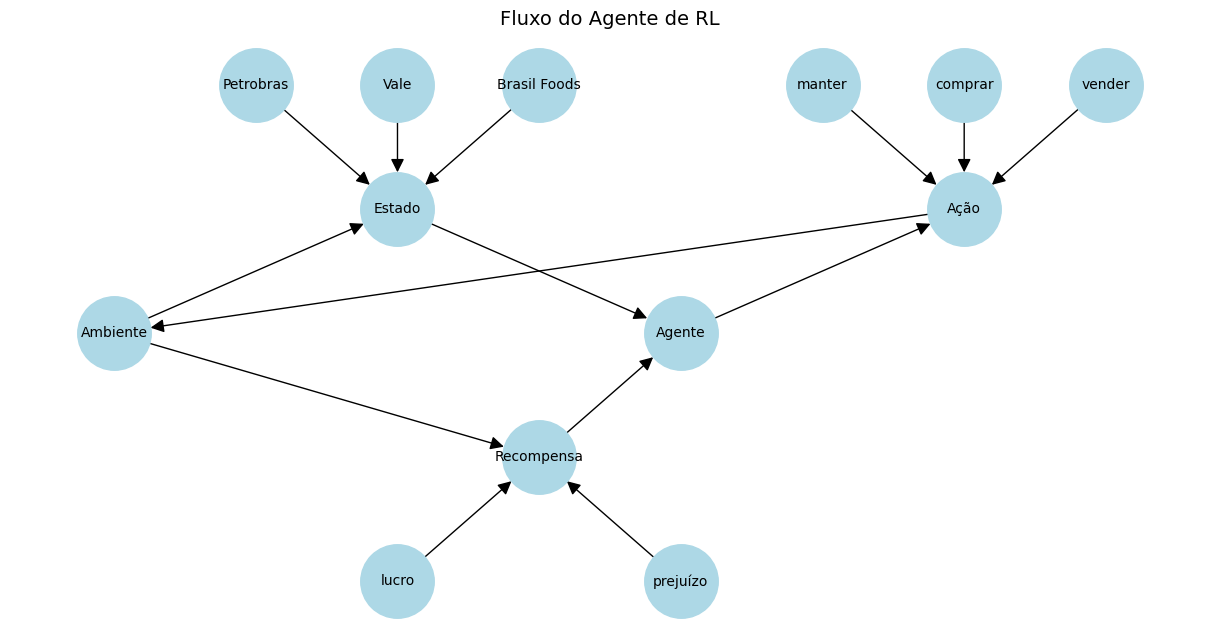

In [60]:
G = nx.DiGraph()

G.add_edges_from([
    ("Ambiente", "Estado"),
    ("Estado", "Agente"),
    ("Agente", "Ação"),
    ("Ação", "Ambiente"),
    ("Ambiente", "Recompensa"),
    ("Recompensa", "Agente")
])

G.add_edge("Vale", "Estado")
G.add_edge("Petrobras", "Estado")
G.add_edge("Brasil Foods", "Estado")

G.add_edge("comprar", "Ação")
G.add_edge("vender", "Ação")
G.add_edge("manter", "Ação")

G.add_edge("lucro", "Recompensa")
G.add_edge("prejuízo", "Recompensa")

pos = {
    "Ambiente": (0, 1),
    "Estado": (1, 2),
    "Agente": (2, 1),
    "Ação": (3, 2),
    "Recompensa": (1.5, 0),
    "Vale": (1, 3),
    "Petrobras": (0.5, 3),
    "Brasil Foods": (1.5, 3),
    "comprar": (3, 3),
    "vender": (3.5, 3),
    "manter": (2.5, 3),
    "lucro": (1, -1),
    "prejuízo": (2, -1)
}

plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2800, arrowsize=20, font_size=10)
plt.title("Fluxo do Agente de RL", fontsize=14)
plt.show()


## Implementação do Agente RL usando DQN (Deep Q-Learning)

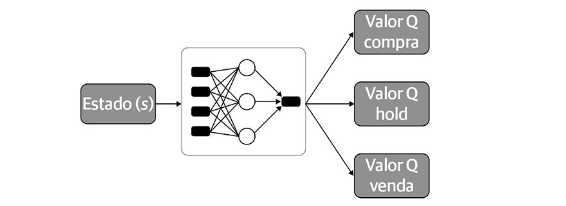

O Deep Q-Network (DQN) é um método de Reinforcement Learning que combina aprendizado profundo com o tradicional Q-Learning. O objetivo principal é treinar o agente para escolher ações que maximizam sua recompensa futura.<br><br>

O processo é dividido em 4 passos principais:<br><br>

- Coleta e pré-processamento dos dados

- Definição do ambiente

- Treinamento do agente com DQN

- Simulação das operações e avaliação

### Coleta e pré-processamento dos dados

Para este projeto, utilizaremos a biblioteca yfinance, que oferece acesso gratuito e conveniente aos preços ajustados (considerando dividendos e splits) dos ativos Vale (VALE3.SA), Petrobras (PETR4.SA) e Brasil Foods (BRFS3.SA)

O período utilizado será referente a 01-01-2022 a 31-12-2024

Em seguida utilizamos um método do pandas que preenche valores faltantes com o valor válido mais recente disponível ("forward fill"), selecionamos apenas a coluna "preço de fechamento ajustado" (Adj Close), e removemos qualquer valor restante faltante com dropna

In [61]:
tickers = ["VALE3.SA", "PETR4.SA", "BRFS3.SA"]

df = yf.download(tickers, start="2022-01-01", end="2024-12-31",auto_adjust=False)

df = df.fillna(method='ffill')["Adj Close"].dropna()

[*********************100%***********************]  3 of 3 completed
<ipython-input-61-efd0fcc6c8f0>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')["Adj Close"].dropna()


Dataset apenas com data e a coluna Adj Close referente aos ativos, obtidos da API YFinance

In [62]:
df.head()

Ticker,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,
2022-01-03,22.007359,11.173077,59.548798
2022-01-04,21.249138,11.215325,58.846432
2022-01-05,21.514515,10.781305,59.403744
2022-01-06,23.030956,10.773625,60.602356
2022-01-07,23.315289,10.823557,64.129478


### Definição do Ambiente

**Estado:**<br>
O ambiente define um estado com:<br>

* Preços atuais das ações
* Posições do agente em cada ação
* Saldo disponível<br><br>

**Ações possíveis:**<br>
Cada ação tem três possibilidades:<br>

* Comprar uma unidade (se houver saldo suficiente)
* Vender uma unidade (se possuir a ação)
* Manter (não fazer nada)<br><br>

Por exemplo, com 3 ativos há 9 ações possíveis:<br><br>

| Código | Ação                |
| ------ | ------------------- |
| 0      | Comprar Vale        |
| 1      | Vender Vale         |
| 2      | Manter Vale         |
| 3      | Comprar Petrobras   |
| 4      | Vender Petrobras    |
| 5      | Manter Petrobras    |
| 6      | Comprar BrasilFoods |
| 7      | Vender BrasilFoods  |
| 8      | Manter BrasilFoods  |

<br>**Recompensa:**<br>
A recompensa é o lucro ou prejuízo obtido pelo agente entre dois passos consecutivos.<br><br>

**Funcionamento básico:**<br>
reset():
Reinicia o ambiente no início de uma simulação com saldo inicial e sem posições.

step(action):
Executa a ação escolhida pelo agente, atualiza saldo, posições e calcula a recompensa (variação patrimonial).

Exemplo simplificado:

```env = FinanceEnv(df)
state = env.reset()  # reiniciar ambiente
action = 0  # exemplo: comprar Vale
next_state, reward, done, _ = env.step(action)
```


#### Implementação da classe FinanceEnv

A classe FinanceEnv define um ambiente de negociação financeira compatível com o padrão da biblioteca OpenAI Gym. Ela é usada para simular as operações financeiras de compra, venda ou manutenção de ativos, permitindo ao agente RL aprender uma estratégia ótima através da interação.<br><br>

Explicação detalhada da classe:<br>

- **class FinanceEnv(gym.Env):**<br>
  - A classe é derivada de gym.Env, tornando-a compatível com algoritmos padrões de Reinforcement Learning (RL) no Gym<br><br>

- **__init__(self, data, initial_balance=10000)**<br>
  - Método construtor que inicializa o ambiente
  - data: Dados históricos dos preços das ações fornecidos como um DataFrame
  - initial_balance: Saldo inicial disponível para negociação (padrão = 10.000)<br><br>

- **Variáveis internas definidas neste método:**<br>
  - **self.data:** Dados convertidos para um array NumPy
  - **self.prices:** DataFrame original contendo os preços
  - **self.n_assets:** Número de ativos presentes nos dados
  - **self.balance:** Saldo inicial do agente
  - **self.positions:** Array contendo a quantidade atual de ações detidas pelo agente, inicialmente zerado
  - **self.current_step:** Índice do passo atual na série temporal<br><br>

- **Definição dos espaços:**<br>
  - **self.action_space:** Discreto com **3 * número_de_ativos** opções (comprar, vender, manter para cada ativo)
  - **self.observation_space:** Contínuo, com tamanho **2 * número_de_ativos + 1** representando preços, posições atuais e saldo disponível.<br><br>

- **Método: reset(self)**<br>
  - Reinicia o ambiente ao estado inicial antes de começar uma nova simulação ou treinamento
  - Reseta o saldo, posições e o passo atual para os valores iniciais
  - Retorna a observação inicial do ambiente<br><br>

- **Método auxiliar: _get_obs(self)**<br>
  - Retorna uma observação completa do estado atual
  - Combina em um único vetor:
   - Preços atuais dos ativos (self.prices.iloc[self.current_step])
   - Posições atuais em cada ativo (self.positions)
   - Saldo atual (self.balance)<br><br>

- **Método: step(self, action)**<br>
  - Realiza uma ação (comprar, vender ou manter), atualiza o ambiente e calcula a recompensa.<br><br>

- **Como as ações são interpretadas:**<br>
  - asset = action // 3
Determina qual ativo será negociado (0, 1 ou 2, por exemplo, Vale, Petrobras ou Brasil Foods).
  - act_type = action % 3
Determina o tipo da ação:
    - 0: Comprar
    - 1: Vender
    - 2: Manter<br><br>

- **Lógica das ações executadas:**<br>
  - Comprar: verifica se há saldo suficiente.
Atualiza posições e saldo.
  - Vender: verifica se há ações suficientes para vender.
Atualiza posições e saldo.
  - Manter: nenhuma ação é tomada.<br><br>

- **Atualização do ambiente após a ação:**<br>
 - Incrementa o passo temporal (self.current_step).
 - Verifica se a simulação terminou (done).<br><br>

- **Cálculo da recompensa:**<br>
 - Novo patrimônio (new_patrimony): saldo mais valor atual das posições.
 - Patrimônio anterior (old_patrimony): saldo mais valor das posições no passo anterior.
 - Recompensa: diferença entre o patrimônio novo e o antigo (representando o ganho ou a perda obtida com a ação executada).

In [63]:
class FinanceEnv(gym.Env):
    def __init__(self, data, initial_balance=10000):
        super(FinanceEnv, self).__init__()
        self.data = data.values
        self.prices = data
        self.n_assets = data.shape[1]
        self.balance = initial_balance
        self.positions = np.zeros(self.n_assets)
        self.current_step = 0

        self.action_space = gym.spaces.Discrete(3 * self.n_assets)
        self.observation_space = gym.spaces.Box(
            low=0, high=np.inf, shape=(2*self.n_assets + 1,)
        )

    def reset(self):
        self.balance = 10000
        self.positions = np.zeros(self.n_assets)
        self.current_step = 0
        return self._get_obs()

    def _get_obs(self):
        return np.concatenate((self.prices.iloc[self.current_step].values,
                               self.positions,
                               [self.balance]))

    def step(self, action):
        asset = action // 3
        act_type = action % 3

        price = self.prices.iloc[self.current_step, asset]

        if act_type == 0 and self.balance >= price:  # Comprar
            self.positions[asset] += 1
            self.balance -= price

        elif act_type == 1 and self.positions[asset] > 0:  # Vender
            self.positions[asset] -= 1
            self.balance += price

        self.current_step += 1
        done = self.current_step >= len(self.prices) - 1
        new_patrimony = self.balance + np.sum(self.positions * self.prices.iloc[self.current_step])
        old_patrimony = self.balance + np.sum(self.positions * self.prices.iloc[self.current_step - 1])
        reward = new_patrimony - old_patrimony

        return self._get_obs(), reward, done, {}

### Treinamento do Agente DQN

Neste passo, utilizamos o algoritmo DQN do pacote stable_baselines3, um framework que simplifica o uso de técnicas avançadas de RL

O DQN treina uma rede neural para estimar o valor esperado das ações (Q-value):

**Entrada da rede:** o estado atual (preços, posições, saldo)

**Saída da rede:** valor esperado para cada ação possível<br><br>

**MlpPolicy:** é a rede neural padrão (multilayer perceptron)

**total_timesteps:** indica por quantos passos de simulação o modelo será treinado.<br><br>

Durante o treinamento, o DQN explora diferentes ações e aprende quais decisões levam a maiores recompensas

Após a realização do treinamento do agente DQN é gerado um log automaticamente pela biblioteca Stable-Baselines3. Ela resume o desempenho e o progresso do agente em termos de exploração, recompensa, tempo de treinamento e aprendizado.<br>

Abaixo explico cada linha:

#### Interpretação do Log de Treinamento do Agente DQN

| Categoria           | Métrica               | Significado                                                                 |
|---------------------|------------------------|------------------------------------------------------------------------------|
| `rollout/`          | ep_len_mean          | Comprimento médio dos episódios (número de passos por episódio)            |
|                     | ep_rew_mean          | Recompensa média por episódio Mede o quão bem o agente está se saindo     |
|                     | exploration_rate     | Taxa de exploração atual (epsilon). Indica a frequência de ações aleatórias|
| `time/`             |episodes             | Quantidade de episódios completados durante o treinamento                  |
|                     | fps                  | Passos por segundo (velocidade do treinamento)                             |
|                     | time_elapsed         | Tempo total decorrido desde o início do treinamento                        |
|                     | total_timesteps      | Número total de passos de simulação já realizados                          |
| `train/`            | learning_rate        | Taxa de aprendizado da rede neural durante o treinamento                   |
|                     | loss                 | Valor médio da função de perda, que indica o erro do modelo ao prever ações|
|                     | n_updates            | Número de atualizações dos pesos da rede neural                            |


In [64]:
env = FinanceEnv(df)
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 83.3     |
|    exploration_rate | 0.432    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 296      |
|    time_elapsed     | 10       |
|    total_timesteps  | 2992     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.7      |
|    n_updates        | 722      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 347      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 301      |
|    time_elapsed     | 19       |
|    total_timesteps  | 5984     |
| train/              |        

O agente está sobrevivendo bastante nos episódios e obtendo recompensas positivas.

O treinamento está quase concluído (47.872 de 50.000 timesteps).

A exploração foi reduzida para 5%, o que indica que o agente está quase só explorando sua política aprendida.

A perda ainda está alta (28), sugerindo que a rede pode não estar perfeitamente estável. Isso pode melhorar com ajustes no modelo, mais dados ou tuning de hiperparâmetros.

### Simulação das operações (teste do agente treinado)

**Processo da simulação:**
 - O agente observa o estado atual (preços, posições, saldo)
 - Escolhe uma ação com base na política aprendida (modelo treinado)
 - O ambiente realiza a ação e atualiza saldo e posições
 - Registra-se a evolução do patrimônio

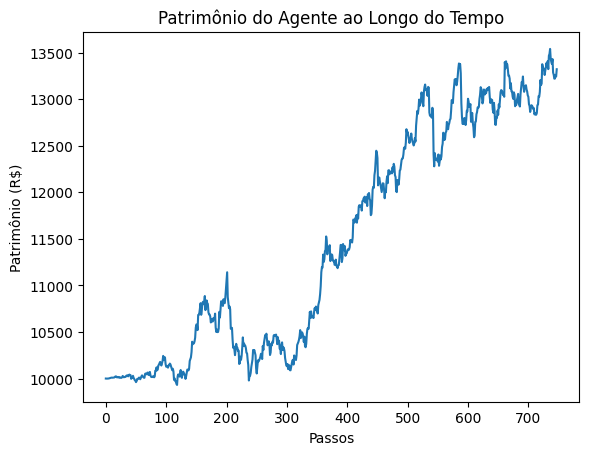

In [65]:
obs = env.reset()
done = False
patrimony_history = []

while not done:
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    patrimony = env.balance + np.sum(env.positions * env.prices.iloc[env.current_step])
    patrimony_history.append(patrimony)

plt.plot(patrimony_history)
plt.title("Patrimônio do Agente ao Longo do Tempo")
plt.xlabel("Passos")
plt.ylabel("Patrimônio (R$)")
plt.show()


O agente partiu de um valor inicial 10.000 e chegou a mais de 13.500, o que representa um retorno total positivo.

O comportamento da curva mostra que o modelo não está apenas acumulando aleatoriamente, mas aprendendo padrões que levam a decisões eficazes.

Pode-se dizer que o agente teve sucesso em seu treinamento, dado que ele aumentou o patrimônio de forma progressiva e sustentada.

## Avaliação do Desempenho

As seguintes métricas financeiras são utilizadas para avaliar o desempenho do agente de Reinforcement Learning:

---

**Retorno Total**

$$
\text{Retorno Total} = \frac{P_{\text{final}} - P_{\text{inicial}}}{P_{\text{inicial}}}
$$

**Onde:**

- P_inicial: patrimônio no início da simulação  
- P_final: patrimônio no final da simulação

---

**Sharpe Ratio (Anualizado)**

$$
\text{Sharpe Ratio} = \frac{\mu_r}{\sigma_r} \times \sqrt{252}
$$

**Onde:**

- μ_r: média dos retornos diários  
- σ_r: desvio padrão dos retornos diários  
- 252: número aproximado de dias úteis no ano

---

**Máximo Drawdown (queda máxima do patrimônio)**

$$
\text{Máximo Drawdown} = \min\left( \frac{P_t}{P_{\text{máximo}}} - 1 \right)
$$

**Onde:**

- P_t: patrimônio no tempo t  
- P_máximo: maior patrimônio observado até o tempo t

---

Essas métricas ajudam a avaliar não apenas o quanto o agente lucrou, mas também a **qualidade desse lucro em termos de risco e consistência**



| Código         | Significado                                                           |
| -------------- | --------------------------------------------------------------------- |
| `returns`      | Calcula o retorno percentual diário (variação do patrimônio).         |
| `sharpe_ratio` | Mede o retorno ajustado ao risco (quanto lucro por unidade de risco). |
| `total_return` | Calcula o lucro total obtido durante toda a simulação.                |
| `max_drawdown` | Indica a pior queda contínua do patrimônio ao longo do tempo.         |


In [66]:
returns = pd.Series(patrimony_history).pct_change().dropna()

sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # anualizado
total_return = (patrimony_history[-1] - patrimony_history[0]) / patrimony_history[0]
max_drawdown = (returns.cummin().min())

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Retorno Total: {total_return * 100:.2f}%")
print(f"Máximo Drawdown: {max_drawdown * 100:.2f}%")


Sharpe Ratio: 1.14
Retorno Total: 33.21%
Máximo Drawdown: -3.48%


- **Retorno Total: 33.21%**
  - O agente aumentou seu patrimônio em 33,21% ao longo da simulação.
  - Isso significa que, partindo de 10.000, por exemplo, ele terminou com aproximadamente 13.321.
  - **Conclusão:** um excelente resultado de rentabilidade bruta em um único ciclo de treinamento.<br><br>

- **Sharpe Ratio: 1.14**
  - Mede o retorno ajustado ao risco.
  - Um Sharpe Ratio acima de 1.0 indica que o agente está gerando bons retornos em relação ao risco que está correndo.
  - Entre 1 e 2: bom, acima de 2: excelente
  - **Conclusão:** o agente está gerando lucros de maneira eficiente em termos de risco, com baixo nível de volatilidade relativa.<br><br>

- **Máximo Drawdown: -3.48%**
  - Representa a maior queda do patrimônio desde um topo anterior até um fundo posterior, durante o período analisado.
  - Uma queda máxima de apenas 3,48% é muito baixa e indica que o agente evitou grandes perdas.
  - **Conclusão:** o agente teve ótimo controle de risco, enfrentando variações mínimas mesmo em momentos desfavoráveis.<br><br>

# Considerações e Potencial

A aplicação do aprendizado por reforço no domínio financeiro apresenta grande potencial para transformar a maneira como fundos de investimento operam, oferecendo decisões automatizadas baseadas em aprendizado contínuo e adaptativo.

Contudo, é fundamental reconhecer os desafios existentes, tais como o risco de overfitting aos dados históricos, a necessidade de validação robusta e o gerenciamento prudente dos riscos inerentes à automação financeira.

Se bem implementado, o agente pode não apenas proporcionar uma gestão mais eficiente dos investimentos, como também oferecer insights estratégicos valiosos para investidores e gestores financeiros, destacando-se como um instrumento inovador e competitivo no mercado financeiro contemporâneo.